In [1]:
'''
Scikit Learn dataset loading utilities
http://scikit-learn.org/stable/datasets/index.html
'''
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster
from sklearn import datasets
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [2]:
# load digits data
digits = datasets.load_digits()

In [3]:
# print keys of digits
print(digits.keys())
print("")

# print information of digits data
print("* digits data\n", digits.data)
print("(samples total, dimensionality) =", digits.data.shape)
print("")

# print information of digits target
print("* digits target\n", digits.target)
print("(samples total,) =", digits.target.shape)
print("")

# print information of digits target_names
print("* digits target_names\n", digits.target_names)
print("(target names total,) =", digits.target_names.shape)
print("")

# print discription of digits
print("* digits DESCR\n", digits.DESCR)
print("")

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

* digits data
 [[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
(samples total, dimensionality) = (1797, 64)

* digits target
 [0 1 2 ..., 8 9 8]
(samples total,) = (1797,)

* digits target_names
 [0 1 2 3 4 5 6 7 8 9]
(target names total,) = (10,)

* digits DESCR
 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwr

In [4]:
# isolate digits data, digits target and digits images
digits_data = digits.data
digits_target = digits.target
digits_images = digits.images

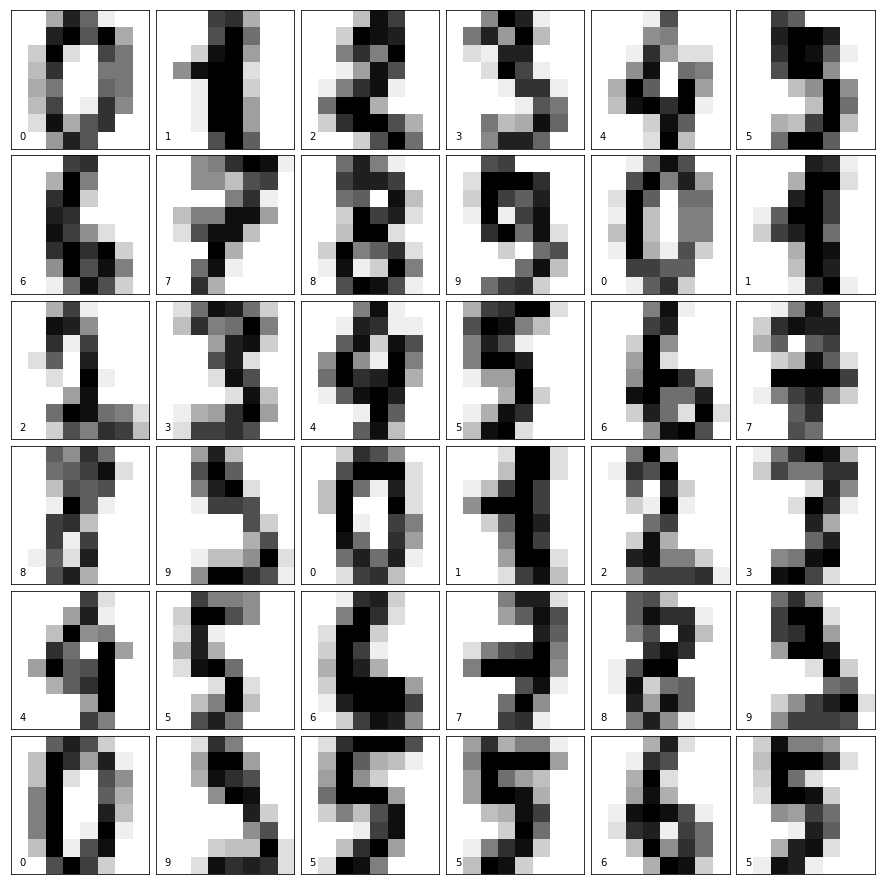

In [5]:
# set figure size
fig = plt.figure(figsize=(12, 12))

# adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# loop over the first 36 images
for i in range(36):
    # initialize the subplots
    # add a subplot in the grid of 6 by 6, at the i+1-th position
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    # display an image
    ax.imshow(digits_images[i], cmap=plt.cm.binary, interpolation='nearest')
    # add label (target value)
    ax.text(0, 7, str(digits_target[i]))

# show the plot
plt.show()

In [6]:
# set a PCA model that runs randomized SVD
randomized_pca = PCA(n_components=2, svd_solver='randomized')

# fit and transform digits_data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits_data)

# show informattion of reduced_data_rpca
print(reduced_data_rpca.shape)
print(reduced_data_rpca)

(1797, 2)
[[ -1.25946278  21.27488718]
 [  7.95761709 -20.76869425]
 [  6.99191751  -9.95599054]
 ..., 
 [ 10.80128448  -6.96024951]
 [ -4.87209309  12.42395994]
 [ -0.34439523   6.36554516]]


In [7]:
# create a PCA model
pca = PCA(n_components=2)

# fit and transform digits_data to the model
reduced_data_pca = pca.fit_transform(digits_data)

# show informattion of reduced_data_pca
print(reduced_data_pca.shape)
print(reduced_data_pca)

(1797, 2)
[[ -1.25946788  21.27487968]
 [  7.95761329 -20.76869328]
 [  6.99192381  -9.95598452]
 ..., 
 [ 10.80127983  -6.96026374]
 [ -4.87210454  12.42394107]
 [ -0.34439499   6.36553388]]


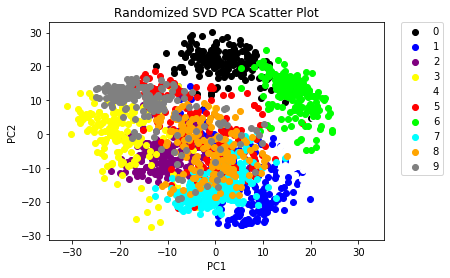

In [8]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits_target == i]
    y = reduced_data_rpca[:, 1][digits_target == i]
    plt.scatter(x, y, c=colors[i])
    
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Randomized SVD PCA Scatter Plot")
plt.show()

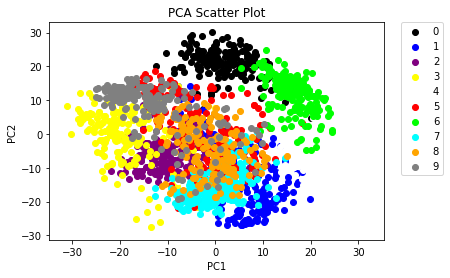

In [9]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

for i in range(len(colors)):
    x = reduced_data_pca[:, 0][digits_target == i]
    y = reduced_data_pca[:, 1][digits_target == i]
    plt.scatter(x, y, c=colors[i])
    
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA Scatter Plot")
plt.show()

In [10]:
# normalize the digits_data
normalized_digits_data = scale(digits_data)

# print information of normalized digits data
print("* normalized digits_data\n", normalized_digits_data)
print("(samples total, dimensionality) =", normalized_digits_data.shape)

* normalized digits_data
 [[ 0.         -0.33501649 -0.04308102 ..., -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...,  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...,  1.56568555  1.6951369
  -0.19600752]
 ..., 
 [ 0.         -0.33501649 -0.88456568 ..., -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...,  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...,  0.8876023  -0.26113572
  -0.19600752]]
(samples total, dimensionality) = (1797, 64)


In [11]:
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(normalized_digits_data, 
                                                                               digits.target, 
                                                                               digits.images, 
                                                                               test_size=0.25, 
                                                                               random_state=42)

In [12]:
print("training data")
print("(samples total, dimensionality) =", X_train.shape)
print("(samples total,) =", y_train.shape)
print(len(np.unique(y_train)))
print("")

print("test data")
print("(samples total, dimensionality) =", X_test.shape)
print("(samples total,) =", y_test.shape)
print(len(np.unique(y_test)))
print("")

training data
(samples total, dimensionality) = (1347, 64)
(samples total,) = (1347,)
10

test data
(samples total, dimensionality) = (450, 64)
(samples total,) = (450,)
10



In [13]:
# create a kmeans model with 10 clusters
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

# fit X_train to the model
clf.fit(X_train)

# show the shape of the cluster centers
print("(total cluster centers, dimensionality) =", clf.cluster_centers_.shape)

(total cluster centers, dimensionality) = (10, 64)


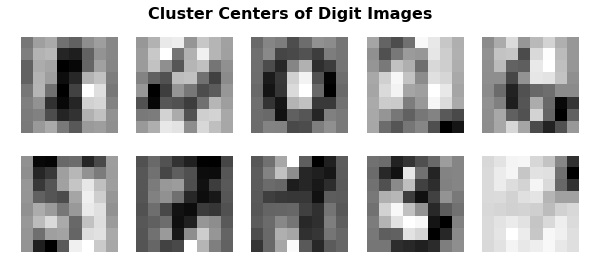

In [14]:
# set figure size
fig = plt.figure(figsize=(10, 4))

# set title
fig.suptitle('Cluster Centers of Digit Images', fontsize=16, fontweight='bold')

# loop over all labels (0-9)
for i in range(10):
    # initialize subplots in a grid of 2 by 5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # display images
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # remove the axes
    plt.axis('off')

# show the plot
plt.show()

In [15]:
# predict the labels for X_test
y_pred=clf.predict(X_test)

# join y_pred and y_test into a list
pred_and_test = list(zip(y_pred, y_test))

# display the first 25 instance pairs of of y_pred and y_test
print("the first 25 instance pairs of of y_pred and y_test")
for index, (label_pred, label_test) in enumerate(pred_and_test[:25]):
    print("predicted , test =", label_pred, ",", label_test)

the first 25 instance pairs of of y_pred and y_test
predicted , test = 4 , 6
predicted , test = 8 , 9
predicted , test = 8 , 3
predicted , test = 9 , 7
predicted , test = 3 , 2
predicted , test = 3 , 1
predicted , test = 5 , 5
predicted , test = 8 , 2
predicted , test = 5 , 5
predicted , test = 3 , 2
predicted , test = 0 , 1
predicted , test = 7 , 9
predicted , test = 1 , 4
predicted , test = 2 , 0
predicted , test = 1 , 4
predicted , test = 3 , 2
predicted , test = 8 , 3
predicted , test = 6 , 7
predicted , test = 8 , 8
predicted , test = 8 , 8
predicted , test = 1 , 4
predicted , test = 5 , 3
predicted , test = 8 , 9
predicted , test = 6 , 7
predicted , test = 5 , 5


In [16]:
# show the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


In [17]:
num_of_hit = 0
for index, (label_pred, label_test) in enumerate(pred_and_test):
    if int(label_pred) == int(label_test):
        num_of_hit +=1
        
print("hit rate:", num_of_hit, "/", len(y_test))

hit rate: 54 / 450


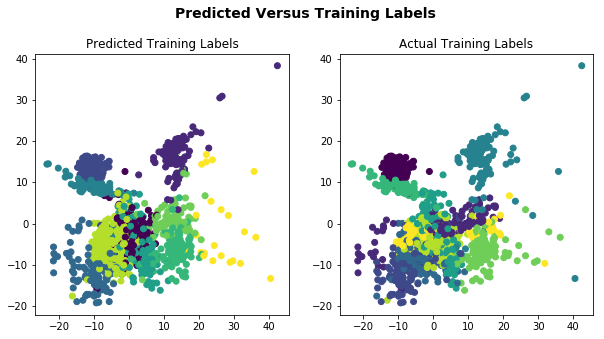

In [18]:
# fit the digits data to isomap, which is a non-linear reduction method
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# create a plot with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# add scatterplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# show the results
plt.show()

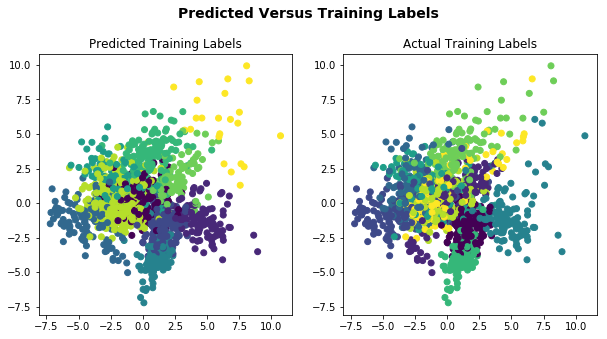

In [19]:
# fit the digits data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X_train)

# compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# create a plot with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# add scatterplots
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# show the results
plt.show()